# Task 1

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 12 11:58:58 2019

@author: asus
"""

import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

# Задаем seed для повторяемости результатов
numpy.random.seed(42)

# Загружаем данные
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Размер мини-выборки
batch_size = 32
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 35

# Нормализуем данные
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Создаем последовательную модель
model = Sequential()
# Формирование вектора, отвечающего за размерность входных данных: 
# либо (кол-во каналов, ширина, высота), либо (ширина, высота, кол-во каналов) 
# (в зависимости от значения параметра "image_data_format" в файле keras.json)
shape_vector = X_train.shape[1:]
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=shape_vector, activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

# Задаем параметры оптимизации
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
# Обучаем модель
model.fit(X_train, Y_train,
              batch_size=128,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=1)

# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

# model_json = model.to_json()
# # Записываем модель в файл
# json_file = open("cifar_nn.json", "w")
# json_file.write(model_json)
# json_file.close()
# model.save_weights("cifar_nn.h5")

Using TensorFlow backend.


Train on 45000 samples, validate on 5000 samples
Epoch 1/35
45000/45000 [==============================] - 127s 3ms/step - loss: 1.9939 - acc: 0.2692 - val_loss: 1.6570 - val_acc: 0.4068
Epoch 2/35
45000/45000 [==============================] - 207s 5ms/step - loss: 1.5809 - acc: 0.4253 - val_loss: 1.3620 - val_acc: 0.5120
Epoch 3/35
45000/45000 [==============================] - 138s 3ms/step - loss: 1.3653 - acc: 0.5062 - val_loss: 1.2813 - val_acc: 0.5456
Epoch 4/35
37120/45000 [=======================>......] - ETA: 38s - loss: 1.2370 - acc: 0.5558

KeyboardInterrupt: 

In [3]:
from keras.models import model_from_json
json_filename = "cifar_nn.json"
with open(json_filename, "r") as json_file:
    loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)

# Загружаем веса в модель
h5_filename = "cifar_nn.h5"
model.load_weights(h5_filename)

# Перед использованием загруженной нейронной сети необходимо её скомпилировать
model.compile(loss="categorical_crossentropy", optimizer="SGD", 
              metrics=["accuracy"])


9


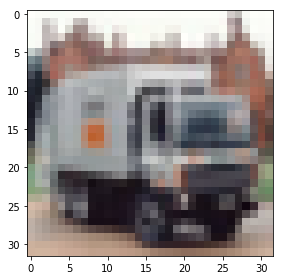

In [14]:
from skimage.io import imshow 
%matplotlib inline

index = 11  

imshow(X_test[index])


import numpy as np
res = model.predict(X_test[index].reshape((1, 32, 32, 3)))
print(np.argmax(res))

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 12 15:09:27 2019

@author: asus
"""

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.backend import image_data_format

# Устанавливаем seed для повторяемости результатов
# numpy.random.seed(42)

# Загружаем данные
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# print(X_train.shape)

# # Формирование вектора размерности (зависит от параметра из файла keras.json)

# # Преобразование размерности изображений
# X_train = X_train.reshape(X_train.shape[0], *input_shape)
# X_test = X_test.reshape(X_test.shape[0], *input_shape)

import pandas as pd
train = pd.read_csv('digit-recognizer/train.csv')
test = pd.read_csv('digit-recognizer/test.csv')
sample = pd.read_csv('digit-recognizer/sample_submission.csv')
X_train = train.values[:, 1:].reshape((train.shape[0], 28, 28))
y_train = train.values[:, 0]
X_submission = test.values.reshape((test.shape[0], 28, 28))

input_shape = ((1, *X_train.shape[1:]) if 
               image_data_format() == 'channels_first' else 
               (*X_train.shape[1:], 1))
X_train = X_train.reshape(X_train.shape[0], *input_shape)
X_submission = X_submission.reshape(X_submission.shape[0], *input_shape)

# Нормализация данных
X_train = X_train.astype('float32')
X_submission = X_submission.astype('float32')
X_train /= 255
X_submission /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, 10)
# Y_test = np_utils.to_categorical(y_test, 10)

# Создаем последовательную модель
model = Sequential()

model.add(Conv2D(75, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(100, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Компилируем модель
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=["accuracy"])

print(model.summary())

# Обучаем сеть
model.fit(X_train, Y_train, batch_size=200, epochs=20, validation_split=0.2, 
          verbose=1)

# Оцениваем качество обучения сети на тестовых данных
# scores = model.evaluate(X_test, Y_test, verbose=0)
# print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

model_json = model.to_json()
# Записываем модель в файл
json_file = open("mnist_nn.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("mnist_nn.h5")

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 75)        1950      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 75)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 100)         187600    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 100)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

In [2]:
y_submission = model.predict(X_submission)

In [4]:
import numpy as np

In [7]:
res = np.argmax(y_submission, axis=1)

In [14]:
sumb = pd.DataFrame(data = [[i+1, res[i]] for i in range(res.shape[0])], columns=['ImageID', 'Label'])

In [17]:
sumb.to_csv('kk.csv', index=False)

In [ ]:
train_test_split()